In [1]:
%matplotlib inline


# IsolationForest example


An example using :class:`sklearn.ensemble.IsolationForest` for anomaly
detection.

The IsolationForest 'isolates' observations by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the
number of splittings required to isolate a sample is equivalent to the path
length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure
of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies.
Hence, when a forest of random trees collectively produce shorter path lengths
for particular samples, they are highly likely to be anomalies.




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [99]:
train_df = pd.read_csv(r'data	rain.csv', parse_dates=['origination_date', 'first_payment_date'], infer_datetime_format=True)

In [100]:
test_df = pd.read_csv(r'data	est	est.csv', parse_dates=['origination_date', 'first_payment_date'], infer_datetime_format=True)

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['financial_institution'] = le.fit_transform(train_df['financial_institution'])
test_df['financial_institution'] = le.fit_transform(test_df['financial_institution'])
le2 = LabelEncoder()
train_df['source'] = le2.fit_transform(train_df['source'])
test_df['source'] = le2.fit_transform(test_df['source'])
le3 = LabelEncoder()
train_df['insurance_type'] = le3.fit_transform(train_df['insurance_type'])
test_df['insurance_type'] = le3.fit_transform(test_df['insurance_type'])
le4 = LabelEncoder()
train_df['loan_purpose'] = le4.fit_transform(train_df['loan_purpose'])
test_df['loan_purpose'] = le4.fit_transform(test_df['loan_purpose'])

In [102]:
train_df.drop(['loan_id', 'first_payment_date', 'origination_date'], axis=1, inplace=True)
test_df.drop(['loan_id', 'first_payment_date', 'origination_date'], axis=1, inplace=True)

In [124]:
# Generate train data
y_train = train_df.m13
X_train = train_df.unpaid_principal_bal
X_test = test_df.unpaid_principal_bal

In [125]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [140]:
# fit the model
clf = IsolationForest(behaviour='new', max_samples=116058,
                      random_state=42, contamination=0.00003)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [141]:
X_train

array([[214000],
       [144000],
       [366000],
       ...,
       [166000],
       [169000],
       [252000]], dtype=int64)

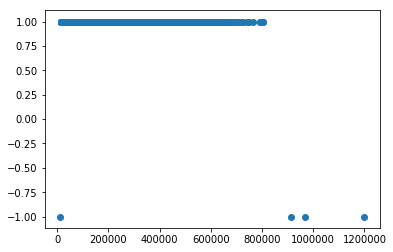

In [142]:
plt.scatter(X_train, y_pred_train, label='Normal')